<a href="https://colab.research.google.com/github/bsenst/LoopOfHenle/blob/main/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [329]:
# https://colab.research.google.com/drive/1UxZ1M0LNUxjiiImYyzObPmgc7_5DE7OH?usp=sharing

import pandas as pd
import numpy as np
! pip install simple-icd-10
import simple_icd_10 as icd
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Loading the 4 Datasets ~ 2.360k rows

In [221]:
dtypes = {"Patient":np.int64, "Report":np.int64, "ID":np.int64, "EntryDate":str, "EntryTime":str, "Code":object , "NCLP":str, "Analyte":str, "ValueNumber":str, "ValueText":str, "RefHigh":object, "RefLow":object, "Unit":str}
lab = pd.read_csv("LabsALL 2015-2022.csv", sep=";", dtype=dtypes, parse_dates=["EntryDate", "EntryTime"])
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017427 entries, 0 to 2017426
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Patient      int64         
 1   Report       int64         
 2   ID           int64         
 3   EntryDate    datetime64[ns]
 4   EntryTime    object        
 5   Code         object        
 6   NCLP         object        
 7   Analyte      object        
 8   ValueNumber  object        
 9   ValueText    object        
 10  RefHigh      object        
 11  RefLow       object        
 12  Unit         object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 200.1+ MB


In [28]:
dgs = pd.read_excel("Dg from report.xlsx")
dgs['Date'] = pd.to_datetime(dgs['Date'], unit='d', origin='1899-12-30')
dgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138718 entries, 0 to 138717
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Patient      138718 non-null  int64         
 1   Date         138718 non-null  datetime64[ns]
 2   mainDgCode   137984 non-null  object        
 3   OtherDgCode  127406 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
demogr = pd.read_excel("hackath 112022 - Age SEX CKD.xlsx")
demogr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15570 entries, 0 to 15569
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Patient  15570 non-null  int64  
 1   Sex      15570 non-null  object 
 2   Age      15570 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 365.0+ KB


In [148]:
demogr2 = pd.read_excel("hackath 112022 - BMI weight height CKD 1.xlsx")
demogr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153251 entries, 0 to 153250
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Patient      153251 non-null  int64         
 1   date         153251 non-null  datetime64[ns]
 2   BMI          153251 non-null  float64       
 3   Weight (kg)  153251 non-null  float64       
 4   Height (cm)  11834 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 5.8 MB


## ~15.000 Patients

In [149]:
print("showing unique patients in each of the 4 tables:", end=" ")
print(dgs.Patient.nunique(), lab.Patient.nunique(), demogr.Patient.nunique(), demogr2.Patient.nunique())

showing unique patients in each of the 4 tables: 15663 336 15570 14354


# Data Exploration: unstructured Data

## Demographic Data (2 Datasets)

In [156]:
print(demogr.columns)
print(demogr2.columns)

Index(['Patient', 'Sex', 'Age'], dtype='object')
Index(['Patient', 'date', 'BMI', 'Weight (kg)', 'Height (cm)'], dtype='object')


### Age and Gender as expected

In [150]:
demogr.Sex.value_counts()

M    8326
F    7244
Name: Sex, dtype: int64

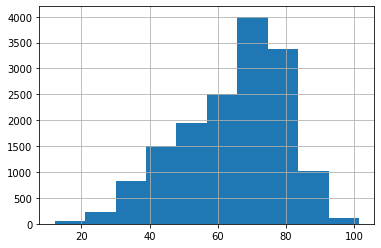

In [120]:
demogr.Age.hist()

### Increased BMI

In [159]:
demogr2[["BMI", "Weight (kg)", "Height (cm)"]].describe()
# BMI outlier

,BMI,Weight (kg),Height (cm)
count,153191.000000,153191.000000,11804.000000
mean,28.815533,86.179338,172.396306
std,5.427697,18.961507,19.211378
min,0.300000,0.800000,104.000000
25%,25.100000,73.000000,165.000000
50%,28.300000,85.000000,172.000000
75%,31.900000,97.700000,179.000000
max,100.000000,227.000000,1667.000000


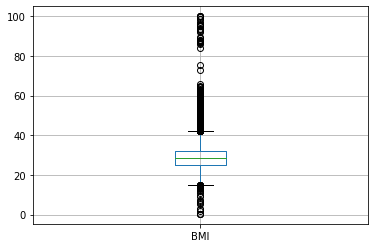

In [155]:
demogr2.boxplot(column=["BMI"])
# many outliers when size or weight are not documented or random placeholder are used

## Diagnoses

In [29]:
dgs.head()

,Patient,Date,mainDgCode,OtherDgCode
0,209536,2015-01-29,E06.3: Autoimunitní tyroiditida,E78.0: Čistá hypercholesterolemie
1,8451,2015-01-08,"E10.9: Diabetes mellitus 1. typu, léč. intenzi...",Autoimunní thyreoiditis
2,8451,2015-01-08,"E10.9: Diabetes mellitus 1. typu, léč. intenzi...",Perniciózní anemie
3,8451,2015-01-08,"E10.9: Diabetes mellitus 1. typu, léč. intenzi...","Surditas vlevo, tinnitus vlevo"
4,8451,2015-01-08,"E10.9: Diabetes mellitus 1. typu, léč. intenzi...",Difuzní jaterní léze - steatóza až incipientní...


In [31]:
icd = [str(i).split(":")[0] for i in dgs.mainDgCode]
# listing the frequency of diseases
dgs["icd"] = icd

In [32]:
dgs = dgs[["Patient", "Date", "icd"]]

In [44]:
for dg in dgs["icd"][dgs.Patient==8451].unique():
  print(icd.get_description(dg))
# One Patient with ID 8451 has Entries at four dates.

Type 1 diabetes mellitus without complications
Autoimmune thyroiditis
Calculus of gallbladder with other cholecystitis


In [181]:
ckd = [ckd for ckd in dgs["icd"] if "N18" in ckd]
len(ckd)
# number of diagnoses N18

455

In [182]:
dgs["ckd"] = [1 if "N18" in ckd else 0 for ckd in dgs.icd]
len(demogr.Patient.unique()) / (len(dgs["Patient"][dgs.ckd==1].unique()) * 100)

2.0486842105263157

### 2% suffering from N18

In [189]:
dgs[dgs.ckd==1].drop_duplicates()

,Patient,Date,icd,ckd
60943,1229879,2022-01-05,N18.5,1
62303,14324,2022-01-07,N18.4,1
62498,68164,2022-01-07,N18.4,1
63058,43841,2022-01-10,N18.4,1
63259,111929,2022-01-10,N18.4,1
...,...,...,...,...
133182,16447,2022-10-10,N18.4,1
135309,174983,2022-10-25,N18.4,1
135955,1254969,2022-11-01,N18.2,1
136502,185245,2022-11-15,N18.4,1


N18.3    39
N18.4    30
N18.2    11
N18.5    10
N18.1     4
N18.9     3
Name: icd, dtype: int64


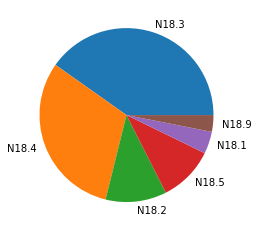

In [191]:
ckd_pdframe = dgs[dgs.ckd==1].drop_duplicates()
ckd_pdseries = ckd_pdframe.icd.value_counts()
print(ckd_pdseries)
plt.pie(ckd_pdseries.values, labels=list(ckd_pdseries.index))
plt.show()

### HTN, CAD, DM, DCM, AFib, CHF most common

In [91]:
commonicd = dgs.icd.value_counts()[:40]
for i, c in commonicd.items():
  # print(i, icd.get_description(i), c)
  print(str(c).ljust(8), i, icd.get_description(i))

19526    I10 Essential (primary) hypertension
7256     I25.9 Chronic ischaemic heart disease, unspecified
4771     E11.9 Type 2 diabetes mellitus without complications
4607     E10.7 Type 1 diabetes mellitus with multiple complications
3700     E11.7 Type 2 diabetes mellitus with multiple complications
3402     I42.0 Dilated cardiomyopathy
3144     I48.1 Persistent atrial fibrillation
3109     E78.2 Mixed hyperlipidaemia
3095     I50.0 Congestive heart failure
2918     I25.8 Other forms of chronic ischaemic heart disease
2692     I48.0 Paroxysmal atrial fibrillation
2331     E10.9 Type 1 diabetes mellitus without complications
2097     E06.3 Autoimmune thyroiditis
1987     I34.0 Mitral (valve) insufficiency
1811     I50.1 Left ventricular failure
1730     E11.8 Type 2 diabetes mellitus with unspecified complications
1555     E78.0 Pure hypercholesterolaemia
1358     E78.9 Disorder of lipoprotein metabolism, unspecified
1304     Z95.0 Presence of electronic cardiac devices
1284     I35.

### Circulatory and Metabolic Medicine

In [112]:
specialty = list()
for i in dgs.icd:
  try:
    sg = icd.get_parent(i[:3])
    s = icd.get_parent(sg)
    specialty.append((icd.get_description(s), sg[0]))
  except:
    pass
pd.Series(specialty).value_counts()

(Diseases of the circulatory system, I)                                                                                                  70734
(Endocrine, nutritional and metabolic diseases, E)                                                                                       34231
(Diseases of the digestive system, K)                                                                                                    12447
(Factors influencing health status and contact with health services, Z)                                                                   4279
(Diseases of the respiratory system, J)                                                                                                   2610
(Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism, D)                                  1893
(Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified, R)                                              1723

In [115]:
demogr.Sex.value_counts()

M    8326
F    7244
Name: Sex, dtype: int64

## Laboratory Data

In [225]:
print(list(lab.columns))
lab.shape

['Patient', 'Report', 'ID', 'EntryDate', 'EntryTime', 'Code', 'NCLP', 'Analyte', 'ValueNumber', 'ValueText', 'RefHigh', 'RefLow', 'Unit', 'ckd']


(2017427, 14)

In [223]:
lab.head()

,Patient,Report,ID,EntryDate,EntryTime,Code,NCLP,Analyte,ValueNumber,ValueText,RefHigh,RefLow,Unit
0,324729,27200171,154214712,2022-09-30,30.12.1899 7:42:00,SZU-HEP_0004__R,NaN,HBsAg konfirmace,NaN,externě,NaN,NaN,NaN
1,324729,27200171,154214720,2022-09-30,30.12.1899 7:42:00,ZU-OKM_0024__R,NaN,Rotaviry + Noroviry stolice,NaN,odběr,NaN,NaN,NaN
2,324729,1453155,18244355,2015-04-16,30.12.1899 7:31:00,NaN,03482,s_vápník celk.,2.37,NaN,2.55,2.15,mmol/l
3,324729,1453155,18244356,2015-04-16,30.12.1899 7:31:00,NaN,02618,s_fosfor,1.32,NaN,1.23,0.71,mmol/l
4,324729,1453155,18244357,2015-04-16,30.12.1899 7:31:00,NaN,03940,s_hořčík,0.75,NaN,0.94,0.71,mmol/l


In [224]:
ckd_lab_label = []
for p in lab.Patient:
  if p in set(ckd_pdframe.Patient):
    ckd_lab_label.append(1)
  else:
    ckd_lab_label.append(0)
lab["ckd"] = ckd_lab_label
lab[lab["ckd"]==1]

,Patient,Report,ID,EntryDate,EntryTime,Code,NCLP,Analyte,ValueNumber,ValueText,RefHigh,RefLow,Unit,ckd
12076,43841,27069845,151902046,2022-01-12,30.12.1899 7:00:00,IKEM-PLM_0332__R,NaN,B-CrossLaps(mass),NaN,ordinace,NaN,NaN,NaN,1
12077,43841,27069845,151902047,2022-01-12,30.12.1899 7:00:00,IKEM-PLM_0325__R,NaN,P1NP,NaN,ordinace,NaN,NaN,NaN,1
12078,43841,27069845,151902048,2022-01-12,30.12.1899 7:00:00,IKEM-ISS_0017__R,NaN,25(OH)D3,NaN,ordinace,NaN,NaN,NaN,1
12079,43841,27069845,151902049,2022-01-12,30.12.1899 7:00:00,IKEM-ISS_0016__R,NaN,"1,25(OH)D3",NaN,ordinace,NaN,NaN,NaN,1
12080,43841,27069845,151902050,2022-01-12,30.12.1899 7:00:00,IKEM-PLM_0852__R,NaN,TSH,NaN,ordinace,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896087,10304,27445638,159106886,2022-04-10,30.12.1899 7:43:00,NaN,12374,s_TAG,1.74,NaN,1.69,0.50,mmol/l,1
1896088,10304,27445638,159106887,2022-04-10,30.12.1899 7:43:00,NaN,02036,s_HDL cholest.,0.88,NaN,2.70,1.20,mmol/l,1
1896089,10304,27445638,159106888,2022-04-10,30.12.1899 7:43:00,NaN,01522,s_CRP,13.5,NaN,5.0,0.0,mg/l,1
1896090,10304,27445638,159106889,2022-04-10,30.12.1899 7:43:00,NaN,17357,non HDL cholest.,3.8,NaN,3.8,2.0,mmol/l,1


### common 500 (Crea, ALT, Urea, Chol, ...)

In [304]:
print("there are 1244 unique NCLP", len(lab.NCLP.dropna().unique()))
lab500_series = (lab.NCLP.value_counts()[lab.NCLP.value_counts()>55])
print("NCLP  Frequency  Analyte")
print("most common 500")
for index in lab500_series.index[:10]:
  print(index, lab500_series[index], end="      ")
  print(*lab.Analyte[lab.NCLP==index].unique(), sep=" ")
print("last common 500")
for index in lab500_series.index[-10:]:
  print(index, lab500_series[index], end="         ")
  print(*lab.Analyte[lab.NCLP==index].unique(), sep=" ")

there are 1244 unique NCLP 1244
NCLP  Frequency  Analyte
most common 500
08574 36706      s_kreatinin kreatinin S-kreatinin
00582 32883      s_ALT Alaninaminotransferáza S ALT ALT S-ALT
03086 31295      s_urea Urea urea S_Urea S-urea
01350 31251      s_cholesterol Cholesterol cholesterol S Cholesterol S_Cholesterol Cholesterol celkový S-cholesterol
12374 30986      s_TAG Triacylglyceroly S-triglyceridy
05254 30879      s_draslík K S Kalium S_K Draslík Kalium - draslík
01961 30736      s_GGT Gamma-glutamyltransferáza GGT S-GGT
01675 30220      B_Erytrocyty Erytrocyty Ery
02688 30208      B_Trombocyty Ttrombo Trombocyty Desticky
01991 30206      B_Hemoglobin Hb Hemoglobin
last common 500
04781 58         s_a-kardiol.IgG
04785 58         s_a-kardiol.IgM
16535 57         p_aPTT-LA_1:1
19536 57         s_C peptid
12054 57         p_aPTTnecit_rat
16537 57         p_aPTT-LA1:1-RI
06732 56         CD5 Lymfocyty CD5+
02447 56         Metanefrin
02543 56         Normetanefrin
16538 56         p_

In [229]:
lab.Analyte[lab.NCLP=="08574"].unique()
# when working on the lab values go for the NCLP code it is the standard in CZECH - worldwide LOINC is used.

array(['s_kreatinin', 'kreatinin', 'S-kreatinin'], dtype=object)

In [230]:
lab.Analyte[lab.NCLP=="00582"].unique()

array(['s_ALT', 'Alaninaminotransferáza', 'S ALT', 'ALT', 'S-ALT'],
      dtype=object)

# CKD vs non-CKD

## CKD = 3 kg more weight, 5 years older and male



In [336]:
ckd_demogr_label = []
for p in demogr.Patient:
  if p in set(ckd_pdframe.Patient):
    ckd_demogr_label.append(1)
  else:
    ckd_demogr_label.append(0)
demogr["ckd"] = ckd_demogr_label
demogr["Sex_encoded"] = [1 if s == "M" else 0 for s in demogr.Sex]

In [342]:
demogr[["Age", "Sex_encoded", "ckd"]].groupby("ckd").mean()

,Age,Sex_encoded
ckd,,
0,64.398084,0.534426
1,69.721918,0.602740


In [344]:
ckd_demogr2_label = []
for p in demogr2.Patient:
  if p in set(ckd_pdframe.Patient):
    ckd_demogr2_label.append(1)
  else:
    ckd_demogr2_label.append(0)
demogr2["ckd"] = ckd_demogr2_label
demogr2.groupby("ckd").mean()

,Patient,BMI,Weight (kg),Height (cm)
ckd,,,,
0,446386.073731,28.804626,86.144115,172.391762
1,353706.619545,29.831530,89.460479,172.817460


## Lab test differences

In [339]:
ratio_NCLP_CKD = []
for index in lab500_series.index:
  try:
    mean1 = np.mean([float(x) for x in lab.loc[(lab['ckd']==1) & (lab.NCLP==index)].ValueNumber.dropna()])
    mean2 = np.mean([float(x) for x in lab.loc[(lab['ckd']==0) & (lab.NCLP==index)].ValueNumber.dropna()])
    mean_ratio = mean1/mean2
    if mean_ratio > 1.2 or mean_ratio < 0.8:
      ratio_NCLP_CKD.append((mean_ratio, index))
  except:
    pass

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [350]:
for t in sorted(ratio_NCLP_CKD, reverse=True):
  print(round(t[0], 3), t[1], end=" ")
  print(*lab.Analyte[lab.NCLP==t[1]].unique())

7.163 02395 s_lipáza
4.569 02393 p_lipáza
4.565 19712 s_PSA
4.507 00580 p_ALT ALT
4.389 11447 U_albumin/kreat. V_Index MIAL/U_KRE ACR - albumin/kreatinin v moči U-alb/U-krea ACR = U-albumin / U-kreatinin ACR (Albumin/kreatinin) Albumin/Kreatinin
3.897 03297 U_válce hyalinní U-válce nepatologické
3.712 00919 p_AST AST
3.557 17747 CVVH-vápník ion.
3.229 11596 U_protein/kreat.
3.081 03355 U_erytrocyty Hamburger-ery Erytrocyty erytrocyty U_ery (M sed.) U-erytrocyty
3.063 16337 s_HE4
2.848 19714 s_fPSA
2.843 00513 U_albumin ranní U_Mikroalbumin Albumin v moči Mikroalbuminurie Albuminurie
2.779 14809 s_PSA
2.771 18238 s_parathormon s_PTH(1-84)
2.615 17412 ROMA
2.457 12233 p_prokalcitonin s_prokalcitonin
2.435 00642 p_AMS pankreat.
2.422 16701 U_protein ranní
2.318 00921 s_AST Aspartátaminotransferáza AST S-AST
2.184 08574 s_kreatinin kreatinin S-kreatinin
2.114 14810 s_fPSA
2.036 11519 s_b-2-mikroglob.
2.036 03086 s_urea Urea urea S_Urea S-urea
2.006 08572 p_kreatinin
1.909 14421 s_CMV IgG
1

When comparing CKD vs non-CKD patients these lab values differ to a great extend between these two groups. Among them some which are known to be indicating CKD such as GFR CystatinC ACR Creatinine. Some of them are a consequence of CKD such as Vitamin D deficiency, Anemia, Hyperphophatemia and increased Troponine.